# Models from the Book "Modelling Methods for Marine Science"

## Chapter 8.5: two-box model global ocean phosphate model

In [1]:
V1 = 3e16
V2 = 1e18
FR = 3e13
FO = 6e14

M1 = V1*1020
M2 = V2*1030
FRM = 3e13*1020
FOM = FO* 1020 
print(M1, M2, FRM, FOM)

3.06e+19 1.03e+21 3.06e+16 6.12e+17


In [2]:
# -*- coding: utf-8 -*-

import sys
import copy
import numpy as np
import datetime

from matplotlib import pyplot as plt


BOXSIMU_PATH = '/home/aschi/Documents/MyPrivateRepo/boxsimu_project/'
if not BOXSIMU_PATH in sys.path:
    sys.path.append(BOXSIMU_PATH)

import boxsimu
from boxsimu import (Fluid, Variable, Box, Flow, Condition, 
                     BoxModelSystem, Process, Reaction, Flux, Solution, Solver)
from boxsimu import utils
from boxsimu import ur

In [3]:
# water density parameters
def get_system(): 
    #############################
    # FLUIDS
    #############################
    seawater = Fluid('sea water', rho=1000*ur.kg/ur.meter**3)
    
    #############################
    # CONDITIONS
    #############################
    
    #############################
    # VARIABLES
    #############################
    phosphate = Variable('PO4')
    
    #############################
    # PROCESSES
    #############################
    
    #############################
    # REACTIONS
    #############################
    
    #############################
    # BOXES
    #############################
    upper_ocean = Box(
        name='upper_ocean',
        name_long='Upper Ocean Box',
        fluid=seawater.q(M1*ur.kg), 
    )
    deep_ocean = Box(
        name='deep_ocean',
        name_long='Deep Ocean Box', 
        fluid=seawater.q(M2*ur.kg),
    )
    
    
    #############################
    # FLOWS
    #############################
    flow_downwelling = Flow(
        name='Downwelling', 
        source_box=upper_ocean, 
        target_box=deep_ocean,
        rate=lambda t, c: 6e17*ur.kg/ur.year, 
    )
    
    flow_upwelling = Flow(
        name='Upwelling',
        source_box=deep_ocean, 
        target_box=upper_ocean,
        rate=lambda t, c: 6e17*ur.kg/ur.year, 
    )
    
    flow_river_water = Flow(
        name='River Inflow into Upper Ocean',
        source_box=None, 
        target_box=upper_ocean,
        rate=lambda t, c: 3e16*ur.kg/ur.year, 
    )
    flow_river_water.add_transported_variable(variable=phosphate, concentration=4.6455e-8)
    
    flow_upper_ocean_evaporation = Flow(
        name='Upper Ocean Evaporation',
        source_box=upper_ocean,
        target_box=None,
        rate=lambda t, c: 3e16*ur.kg/ur.year,
    )
    flow_upper_ocean_evaporation.transports_tracers = False
    
    #############################
    # FLUXES
    #############################
    
    #flux1 = Flux('Biological pump', upper_ocean, deep_ocean, phyto, lambda t, c: c.box1.variables.phyto.mass * 0.1 / ur.day)
    
    
    #############################
    # SYSTEM
    #############################
    sys = BoxModelSystem('Test System', 
                          [upper_ocean, deep_ocean], 
                          flows=[flow_downwelling, flow_upwelling, 
                                 flow_river_water, flow_upper_ocean_evaporation],
                          #fluxes=[flux1, ],
    )
    return sys

system = get_system()
solver = Solver(system)

In [4]:
sol = solver.solve(1e7*ur.year, 5e4*ur.year)

Start solving the box model...
- total integration time: 10000000.0 year
- dt (time step): 50000.0 year
> /home/aschi/Documents/MyPrivateRepo/boxsimu_project/boxsimu/solver.py(111)solve()
-> self.system = copy.deepcopy(self._system_initial)
(Pdb) c
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
10.0%
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
20.0%
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
30.0%
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
40.0%
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
50.0%
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
60.0%
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
70.0%
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
80.0%
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
90.0%
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
Functio

(<matplotlib.figure.Figure at 0x7fce90a30a90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fce9021ab38>)

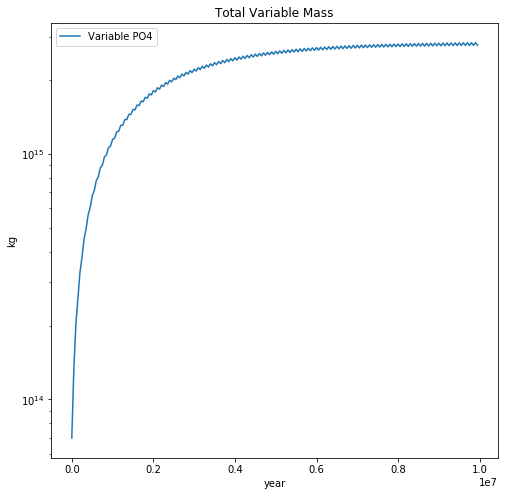

In [5]:
sol.plot_total_variable_masses()

(<matplotlib.figure.Figure at 0x7fce90160550>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fce901409b0>)

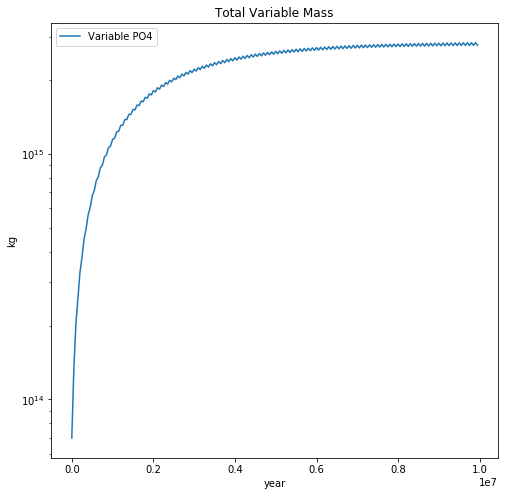

In [6]:
sol.plot_total_variable_masses()